## ЗАВДАННЯ

### Вам пропонується створити рекурентну нейронну мережу за допомогою механізмів Keras, яка буде класифікувати рецензії із датасету imdb. Поекспериментуйте з будовою мережі - RNN, LSTM, двостороння та глибока. Порівняйте результати та зробіть висновки.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, LSTM, Bidirectional

In [2]:
# Завантаження та підготовка даних
max_features = 10000
maxlen = 500

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

17464789/17464789 [==============================] - 0s 0us/step


# RNN

In [3]:
# Створення моделі
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

In [4]:
# Компіляція моделі
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
# Ведення опису моделі:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# Навчання моделі
history = model.fit(train_data, train_labels, epochs=5, batch_size=32, validation_split=0.3)

Epoch 1/5
547/547 [==============================] - 83s 148ms/step - loss: 0.6067 - accuracy: 0.6539 - val_loss: 0.4369 - val_accuracy: 0.8117
Epoch 2/5
547/547 [==============================] - 79s 144ms/step - loss: 0.3867 - accuracy: 0.8317 - val_loss: 0.4471 - val_accuracy: 0.7980
Epoch 3/5
547/547 [==============================] - 74s 136ms/step - loss: 0.2377 - accuracy: 0.9076 - val_loss: 0.4244 - val_accuracy: 0.8263
Epoch 4/5
547/547 [==============================] - 75s 137ms/step - loss: 0.1098 - accuracy: 0.9637 - val_loss: 0.5026 - val_accuracy: 0.8195
Epoch 5/5
547/547 [==============================] - 75s 138ms/step - loss: 0.0658 - accuracy: 0.9771 - val_loss: 0.6177 - val_accuracy: 0.8020


In [7]:
# Оцінка моделі на тестових даних
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f"Точність на тестових даних: {test_acc}")
print(f"Втрати на тестових даних: {test_loss}")

782/782 [==============================] - 23s 29ms/step - loss: 0.6122 - accuracy: 0.7965
Точність на тестових даних: 0.7965199947357178
Втрати на тестових даних: 0.6121689677238464


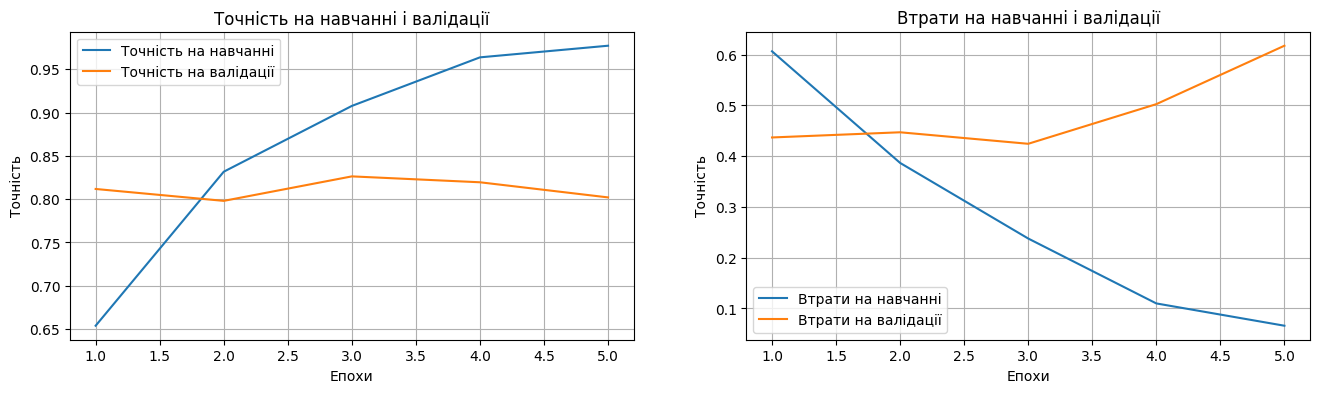

In [8]:
# Виведення результатів
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(epochs, acc, label='Точність на навчанні')
plt.plot(epochs, val_acc, label='Точність на валідації')
plt.title('Точність на навчанні і валідації')
plt.legend()
plt.xlabel('Епохи')
plt.ylabel('Точність')

plt.subplot(1, 2, 2)
plt.grid()
plt.plot(epochs, loss, label='Втрати на навчанні')
plt.plot(epochs, val_loss, label='Втрати на валідації')
plt.title('Втрати на навчанні і валідації')
plt.legend()
plt.xlabel('Епохи')
plt.ylabel('Точність')

plt.show()

In [9]:
# Прогнозування з використанням навченої моделі:
predictions = model.predict(test_data)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {test_labels[i]}")

782/782 [==============================] - 24s 29ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1


### За результатами навчання RNN на даних для тренування та валідації видно наступне:

По завершенню п'ятої епохи точність на тренувальних даних більше 97%, на валідаційних даних становить 80.20%, і втрати на валідаційних даних дорівнюють близько 0.6121. Тобто модель RNN показала досить непоганий результат на валідаційних даних.

Після оцінки моделі на тестових даних точність на тестових даних складає 79.65%, і втрати на тестових даних становлять близько 0.6121.

Це свідчить про те, що модель RNN здатна розпізнавати рецензії з досить прийнятним результатом, але її точність може бути подальшим чином покращена шляхом оптимізації гіперпараметрів, регуляризації та інших покращень.

# LSTM

In [10]:
# Створення моделі LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [11]:
# Компіляція моделі
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
# Ведення опису моделі:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# Навчання моделі
history = model.fit(train_data, train_labels, epochs=5, batch_size=32, validation_split=0.3)

Epoch 1/5
547/547 [==============================] - 143s 257ms/step - loss: 0.4640 - accuracy: 0.7807 - val_loss: 0.4429 - val_accuracy: 0.8044
Epoch 2/5
547/547 [==============================] - 138s 252ms/step - loss: 0.2551 - accuracy: 0.9010 - val_loss: 0.3114 - val_accuracy: 0.8704
Epoch 3/5
547/547 [==============================] - 139s 254ms/step - loss: 0.1843 - accuracy: 0.9346 - val_loss: 0.3476 - val_accuracy: 0.8668
Epoch 4/5
547/547 [==============================] - 136s 249ms/step - loss: 0.1344 - accuracy: 0.9538 - val_loss: 0.3596 - val_accuracy: 0.8708
Epoch 5/5
547/547 [==============================] - 137s 250ms/step - loss: 0.1026 - accuracy: 0.9666 - val_loss: 0.4020 - val_accuracy: 0.8512


In [14]:
# Оцінка моделі на тестових даних
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f"Точність на тестових даних: {test_acc}")
print(f"Втрати на тестових даних: {test_loss}")

782/782 [==============================] - 39s 49ms/step - loss: 0.4136 - accuracy: 0.8467
Точність на тестових даних: 0.8467199802398682
Втрати на тестових даних: 0.41356971859931946


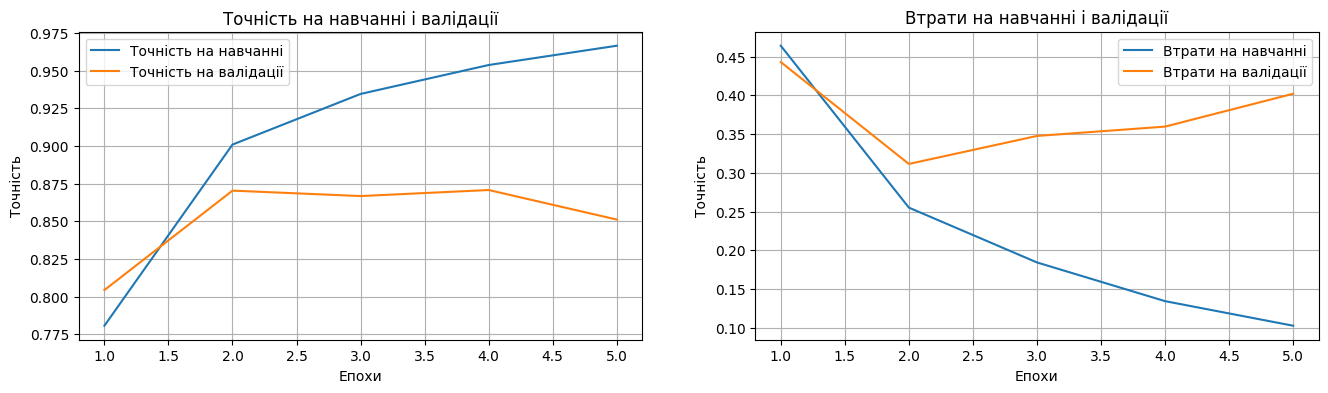

In [15]:
# Виведення результатів
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(epochs, acc, label='Точність на навчанні')
plt.plot(epochs, val_acc, label='Точність на валідації')
plt.title('Точність на навчанні і валідації')
plt.legend()
plt.xlabel('Епохи')
plt.ylabel('Точність')

plt.subplot(1, 2, 2)
plt.grid()
plt.plot(epochs, loss, label='Втрати на навчанні')
plt.plot(epochs, val_loss, label='Втрати на валідації')
plt.title('Втрати на навчанні і валідації')
plt.legend()
plt.xlabel('Епохи')
plt.ylabel('Точність')

plt.show()

In [16]:
# Прогнозування з використанням навченої моделі:
predictions = model.predict(test_data)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {test_labels[i]}")

782/782 [==============================] - 40s 50ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1


### За результатами навчання LSTM на даних для тренування та валідації видно наступне:

По завершенню п'ятої епохи точність на тренувальних даних більше 96%, на валідаційних даних становить 85.12%, і втрати на валідаційних даних дорівнюють близько 0.4020, що є досить високим показником.

Після оцінки моделі на тестових даних ми бачимо, що точність становить 84,67%. Втрати на тестових даних також відносно низькі і складають 0.4135.

Ці результати свідчать про те, що модель на основі LSTM добре справляється з класифікацією рецензій на позитивні та негативні. Вона досягла досить високої точності і може бути використана для аналізу тексту та класифікації рецензій.

# BRNN

In [17]:
# Створення двосторонньої моделі LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

In [18]:
# Компіляція моделі
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
# Ведення опису моделі:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 336705 (1.28 MB)
Trainable params: 336705 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# Навчання моделі
history = model.fit(train_data, train_labels, epochs=5, batch_size=32, validation_split=0.3)

Epoch 1/5
547/547 [==============================] - 234s 419ms/step - loss: 0.4461 - accuracy: 0.7869 - val_loss: 0.3239 - val_accuracy: 0.8699
Epoch 2/5
547/547 [==============================] - 225s 412ms/step - loss: 0.2447 - accuracy: 0.9061 - val_loss: 0.2997 - val_accuracy: 0.8807
Epoch 3/5
547/547 [==============================] - 225s 412ms/step - loss: 0.1950 - accuracy: 0.9282 - val_loss: 0.3277 - val_accuracy: 0.8731
Epoch 4/5
547/547 [==============================] - 227s 416ms/step - loss: 0.1397 - accuracy: 0.9518 - val_loss: 0.3842 - val_accuracy: 0.8792
Epoch 5/5
547/547 [==============================] - 230s 421ms/step - loss: 0.1114 - accuracy: 0.9613 - val_loss: 0.3992 - val_accuracy: 0.8707


In [21]:
# Оцінка моделі на тестових даних
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f"Точність на тестових даних: {test_acc}")
print(f"Втрати на тестових даних: {test_loss}")

782/782 [==============================] - 69s 89ms/step - loss: 0.4479 - accuracy: 0.8546
Точність на тестових даних: 0.8545600175857544
Втрати на тестових даних: 0.44790229201316833


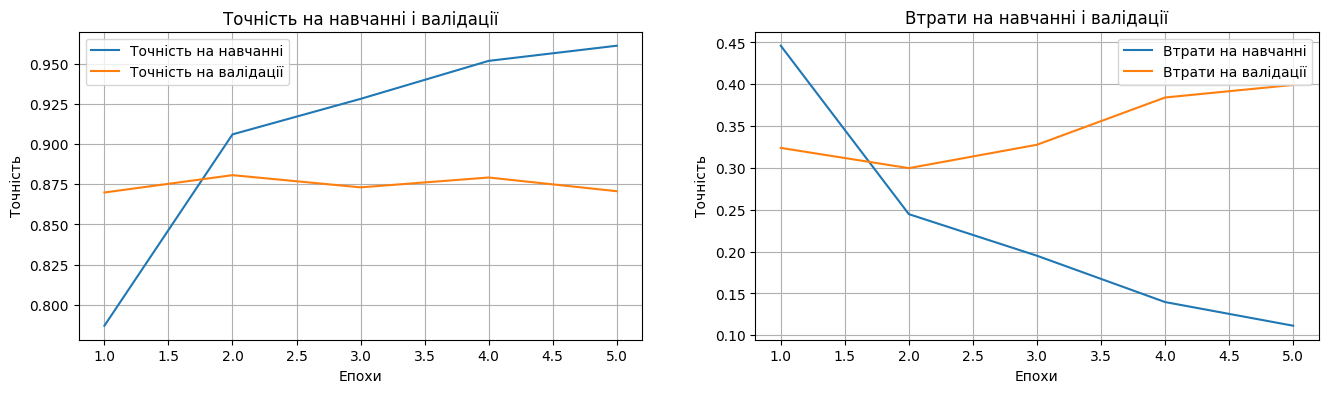

In [22]:
# Виведення результатів
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(epochs, acc, label='Точність на навчанні')
plt.plot(epochs, val_acc, label='Точність на валідації')
plt.title('Точність на навчанні і валідації')
plt.legend()
plt.xlabel('Епохи')
plt.ylabel('Точність')

plt.subplot(1, 2, 2)
plt.grid()
plt.plot(epochs, loss, label='Втрати на навчанні')
plt.plot(epochs, val_loss, label='Втрати на валідації')
plt.title('Втрати на навчанні і валідації')
plt.legend()
plt.xlabel('Епохи')
plt.ylabel('Точність')

plt.show()

In [23]:
# Прогнозування з використанням навченої моделі:
predictions = model.predict(test_data)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {test_labels[i]}")

782/782 [==============================] - 69s 87ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1


### За результатами навчання BRNN на даних для тренування та валідації видно наступне:

По завершенню п'ятої епохи точність на тренувальних даних більше 96%, на валідаційних даних складає 87.07%, і втрати на валідаційних даних дорівнюють близько 0.3992, що є досить високим показником.

Після оцінки моделі на тестових даних ми бачимо, що точність становить 85.45%. Втрати на тестових даних також відносно низькі і складають 0.4479.

Ці результати свідчать про те, що модель BRNN добре справляється з класифікацією рецензій на позитивні та негативні. Вона досягла досить високої точності та може бути використана для аналізу тексту та класифікації рецензій.

У порівнянні з іншими моделями, такими як RNN та LSTM, BRNN також демонструє добрі результати, і точність моделі на тестових даних є приблизно на одному рівні.

# DRNN

In [24]:
# Створення глибокої рекурентної мережі
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

In [25]:
# Компіляція моделі
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
# Ведення опису моделі:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional_1 (Bidirecti  (None, None, 64)          16640     
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 361537 (1.38 MB)
Trainable params: 361537 (1.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
# Навчання моделі
history = model.fit(train_data, train_labels, epochs=5, batch_size=32, validation_split=0.3)

Epoch 1/5
547/547 [==============================] - 489s 880ms/step - loss: 0.4094 - accuracy: 0.8041 - val_loss: 0.2996 - val_accuracy: 0.8819
Epoch 2/5
547/547 [==============================] - 490s 895ms/step - loss: 0.2258 - accuracy: 0.9152 - val_loss: 0.3884 - val_accuracy: 0.8616
Epoch 3/5
547/547 [==============================] - 477s 872ms/step - loss: 0.1443 - accuracy: 0.9502 - val_loss: 0.4139 - val_accuracy: 0.8712
Epoch 4/5
547/547 [==============================] - 481s 880ms/step - loss: 0.1241 - accuracy: 0.9566 - val_loss: 0.3939 - val_accuracy: 0.8639
Epoch 5/5
547/547 [==============================] - 477s 873ms/step - loss: 0.0763 - accuracy: 0.9766 - val_loss: 0.4441 - val_accuracy: 0.8604


In [28]:
# Оцінка моделі на тестових даних
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f"Точність на тестових даних: {test_acc}")
print(f"Втрати на тестових даних: {test_loss}")

782/782 [==============================] - 149s 191ms/step - loss: 0.4671 - accuracy: 0.8548
Точність на тестових даних: 0.8547599911689758
Втрати на тестових даних: 0.4670838415622711


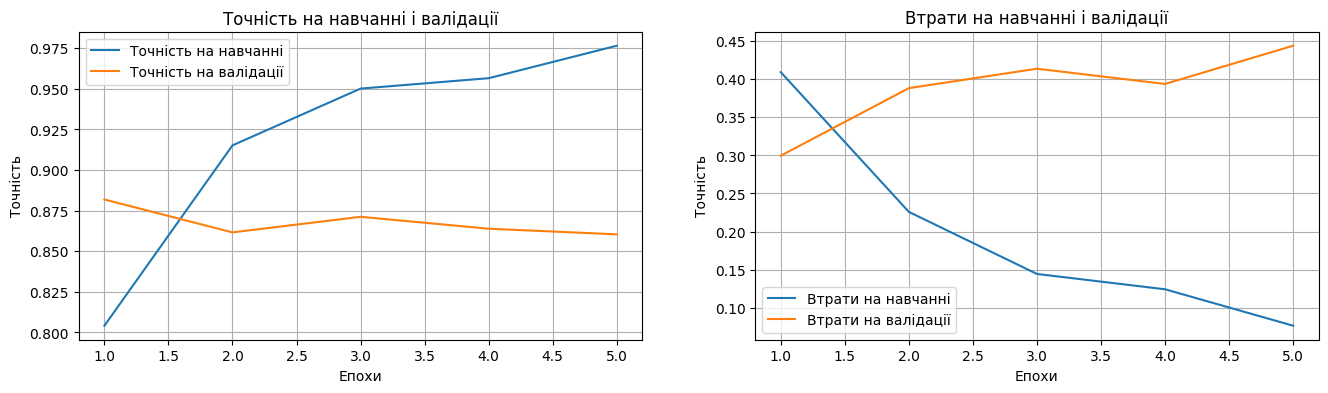

In [29]:
# Виведення результатів
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(epochs, acc, label='Точність на навчанні')
plt.plot(epochs, val_acc, label='Точність на валідації')
plt.title('Точність на навчанні і валідації')
plt.legend()
plt.xlabel('Епохи')
plt.ylabel('Точність')

plt.subplot(1, 2, 2)
plt.grid()
plt.plot(epochs, loss, label='Втрати на навчанні')
plt.plot(epochs, val_loss, label='Втрати на валідації')
plt.title('Втрати на навчанні і валідації')
plt.legend()
plt.xlabel('Епохи')
plt.ylabel('Точність')

plt.show()

In [30]:
# Прогнозування з використанням навченої моделі:
predictions = model.predict(test_data)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {test_labels[i]}")

782/782 [==============================] - 137s 172ms/step
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1


### За результатами навчання DRNN на даних для тренування та валідації видно наступне:

По завершенню п'ятої епохи точність на тренувальних даних більше 97%, на валідаційних даних складає 86.04%, і втрати на валідаційних даних дорівнюють близько 0.4441, що є досить високим показником.

Після оцінки моделі на тестових даних ми бачимо, що точність становить 85.47%. Втрати на тестових даних також відносно низькі і складають 0.4670.

DRNN є конкурентоспроможною моделлю, показуючи дуже добрі результати як на валідаційних, так і на тестових даних. Це одна з кращих моделей серед розглянутих варіантів.

## ЗАГАЛЬНІ ВИСНОВКИ:

на основі результатів кожної з чотирьох різновидів нейронних мереж для аналізу тексту на датасеті IMDB:

| Модель               | Точність на валідації | Точність на тестах | Втрати на валідації | Втрати на тестах |
|----------------------|------------------------|--------------------|----------------------|------------------|
| RNN                  | 80.20%                 | 79.65%             | 0.6121               | 0.6121           |
| LSTM                 | 85.12%                 | 84.67%             | 0.4020               | 0.4135           |
| BRNN                 | 87.07%                 | 85.45%             | 0.3992               | 0.4479           |
| DRNN                 | 86.04%                 | 85.47%             | 0.4441               | 0.4670           |


**BRNN** та **DRNN** продемонстрували найкращу продуктивність серед усіх моделей. Обидві моделі досягли високої точності на валідаційних даних (87.07% для BRNN та 86.04% для DRNN), і мають подібну точність на тестових даних (85.45% для BRNN та 85.47% для DRNN). Втрати на валідаційних даних для BRNN складають 0.3992, а для DRNN - 0.4441. Ці моделі є конкурентоспроможними і показали дуже добрі результати на завданні класифікації рецензій.

**LSTM** також виявилася дуже ефективною, з досягнутою точністю на валідаційних даних в 85.12% і на тестових даних - 84.67%. Втрати на валідаційних даних становлять 0.4020. Модель на основі LSTM добре справляється з завданням класифікації рецензій.

**RNN** показала найнижчу точність серед усіх моделей на валідаційних даних (80.20%) та на тестових даних (79.65%). Втрати на валідаційних даних становлять 0.6121. Ця модель може бути покращена для досягнення кращих результатів.